In [6]:
import pandas as pd           
import numpy as np           
import matplotlib.pyplot as plt  
import seaborn as sns         
import plotly.express as px 

In [16]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# How do laws shape women’s jobs and entrepreneurship?
- How do they (laws) stop women from entering workforce?
- Barriers of entry?
- Council relationship has not proven? Do stronger laws close the gap? Earnings?
- WBL score correlates well to each sector? Which sector has seen the most growth 
- Benchmark
- Fragile and Conflict States 
(Elif Nisa Polat)

In [28]:
# Load data

df_panel = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='WBL Panel 2024')
df_mobility = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Mobility')
df_workplace = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Workplace')
df_pay = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Pay')
df_marriage = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Marriage')
df_parenthood = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Parenthood')
df_assets = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Assets')
df_pension = pd.read_excel('Data/WBL2024-1-0-Historical-Panel-Data.xlsx',sheet_name='Pension')

df_laws_legal_2024 = pd.read_excel('Data/WBL2024-2-0.xlsx',sheet_name='Legal2.0')
df_sfw_legal_2024 = pd.read_excel('Data/WBL2024-2-0.xlsx',sheet_name='SF2.0')
df_sfw_economy2024 = pd.read_excel('Data/WBL2024-2-0.xlsx',sheet_name='EO_ByEconomy')



In [ ]:
region = "Sub-Saharan Africa"

In [26]:
df_panel = df_panel[df_panel["Region"]== "Sub-Saharan Africa"]
df_mobility = df_mobility[df_mobility["Region"]== "Sub-Saharan Africa"]
df_workplace = df_workplace[df_workplace["Region"]== "Sub-Saharan Africa"]
df_pay = df_pay[df_pay["Region"]== "Sub-Saharan Africa"]
df_marriage = df_marriage[df_marriage["Region"]== "Sub-Saharan Africa"]
df_parenthood = df_parenthood[df_parenthood["Region"]== "Sub-Saharan Africa"]
df_assets = df_assets[df_assets["Region"]== "Sub-Saharan Africa"]
df_pension = df_pension[df_pension["Region"]== "Sub-Saharan Africa"]


In [33]:
df_laws_legal_2024 = df_laws_legal_2024[df_laws_legal_2024["Region"]== "Sub-Saharan Africa"]
df_laws_legal_2024.columns

Index(['Economy', 'EconomyCode', 'Region', 'IncomeGroup', 'OVERALL', 'SAFETY',
       'Does the law address child marriage?', 'Legal Basis',
       'Does the law address sexual harassment?', 'Legal Basis.1',
       'Does the law address domestic violence?', 'Legal Basis.2',
       'Does the law address femicide?', 'Legal Basis.3', 'MOBILITY',
       'Can a woman choose where to live in the same way as a man?',
       'Legal Basis.4',
       'Can a woman travel internationally in the same way as a man?',
       'Legal Basis.5',
       'Can a woman travel outside her home in the same way as a man?',
       'Legal Basis.6',
       'Do a woman and a man have equal rights to confer citizenship on their spouses and their children?',
       'Legal Basis.7', 'WORKPLACE',
       'Can a woman get a job in the same way as a man?', 'Legal Basis.8',
       'Does the law explicitly prohibit discrimination in recruitment based on marital status, parental status, and age?',
       'Legal Basis.9',
   

In [35]:
print(df_laws_legal_2024.shape)  # (rows, columns)
print(df_laws_legal_2024.columns)
print(df_laws_legal_2024.head())
print(df_laws_legal_2024.info())
print(df_laws_legal_2024.describe())

(48, 95)
Index(['Economy', 'EconomyCode', 'Region', 'IncomeGroup', 'OVERALL', 'SAFETY',
       'Does the law address child marriage?', 'Legal Basis',
       'Does the law address sexual harassment?', 'Legal Basis.1',
       'Does the law address domestic violence?', 'Legal Basis.2',
       'Does the law address femicide?', 'Legal Basis.3', 'MOBILITY',
       'Can a woman choose where to live in the same way as a man?',
       'Legal Basis.4',
       'Can a woman travel internationally in the same way as a man?',
       'Legal Basis.5',
       'Can a woman travel outside her home in the same way as a man?',
       'Legal Basis.6',
       'Do a woman and a man have equal rights to confer citizenship on their spouses and their children?',
       'Legal Basis.7', 'WORKPLACE',
       'Can a woman get a job in the same way as a man?', 'Legal Basis.8',
       'Does the law explicitly prohibit discrimination in recruitment based on marital status, parental status, and age?',
       'Legal Basi

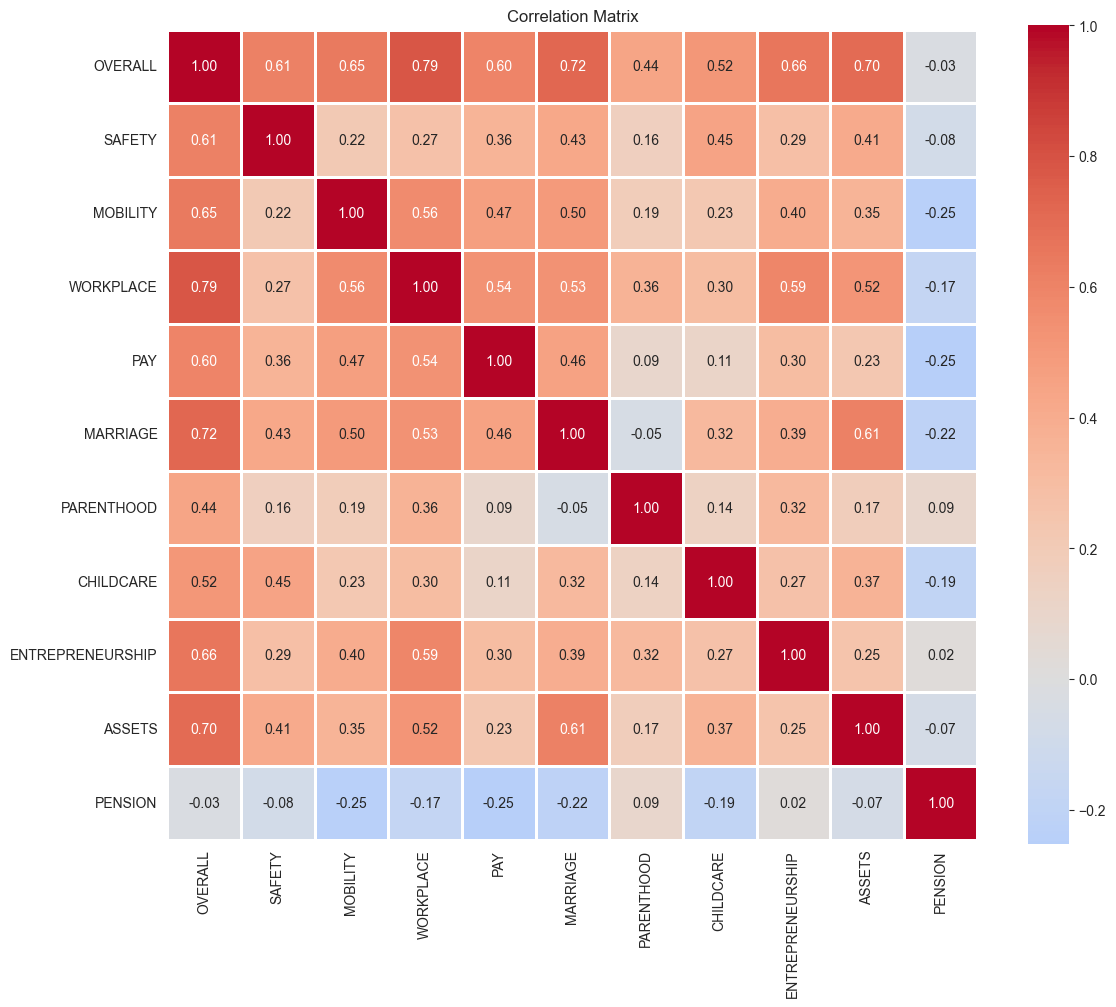

In [37]:
# Correlation Matrix for Women, Business and the Law 2.0 Data for 20244
numeric_cols = df_laws_legal_2024.select_dtypes(include=[np.number]).columns
correlation = df_laws_legal_2024[numeric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Notes: 

In [ ]:
columns_to_convert = ['Does the law address child marriage?', 'Does the law address sexual harassment?',
                      'likes_juice']
df[columns_to_convert] = df[columns_to_convert].apply(
    lambda x: x.str.lower().map({'yes': 1, 'no': 0})

In [ ]:


# ===== PHASE 1: DATA UNDERSTANDING =====

# Basic info
print(df.shape)  # (rows, columns)
print(df.columns)
print(df.head())
print(df.info())
print(df.describe())

# Missing values
print(df.isnull().sum())
missing_pct = (df.isnull().sum() / len(df)) * 100
print(missing_pct[missing_pct > 0])

# ===== PHASE 2: UNIVARIATE ANALYSIS =====

# Distribution of female LFPR
plt.figure(figsize=(10,6))
df['female_lfpr'].hist(bins=30, edgecolor='black')
plt.xlabel('Female Labor Force Participation Rate (%)')
plt.ylabel('Number of Countries')
plt.title('Distribution of Female LFPR Across Countries')
plt.show()

# Box plot to check outliers
df.boxplot(column=['female_lfpr', 'male_lfpr'])
plt.title('Employment Rates by Gender')
plt.show()

# ===== PHASE 3: BIVARIATE ANALYSIS =====

# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plot: Legal rights vs Female LFPR
plt.figure(figsize=(10,6))
sns.regplot(x='wbl_score', y='female_lfpr', data=df, 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Women Business and Law Score')
plt.ylabel('Female LFPR (%)')
plt.title('Legal Rights vs Women\'s Employment')
plt.show()

# Box plot by region
plt.figure(figsize=(12,6))
df.boxplot(column='female_lfpr', by='region', figsize=(12,6))
plt.xlabel('Region')
plt.ylabel('Female LFPR (%)')
plt.title('Female Employment Rates by Region')
plt.suptitle('')  # Remove default title
plt.show()

# ===== PHASE 4: MULTIVARIATE ANALYSIS =====

# Interactive scatter with plotly
fig = px.scatter(df, x='wbl_score', y='female_lfpr', 
                 size='population', color='region',
                 hover_name='country', 
                 title='Legal Rights vs Employment (bubble size = population)')
fig.show()

# Faceted scatter plots by region
g = sns.FacetGrid(df, col='region', col_wrap=3, height=4)
g.map(sns.scatterplot, 'wbl_score', 'female_lfpr')
g.add_legend()
plt.show()

# ===== PHASE 5: TIME SERIES =====

# If you have time series data
time_series_df = df[df['country'].isin(['Rwanda', 'India', 'Brazil'])]

plt.figure(figsize=(12,6))
for country in ['Rwanda', 'India', 'Brazil']:
    country_data = time_series_df[time_series_df['country'] == country]
    plt.plot(country_data['year'], country_data['female_lfpr'], 
             marker='o', label=country)
plt.xlabel('Year')
plt.ylabel('Female LFPR (%)')
plt.title('Female Employment Trends: Selected Countries')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ===== PHASE 6: GAP ANALYSIS =====

# Calculate gender gap
df['gender_gap'] = df['male_lfpr'] - df['female_lfpr']

# Top 10 largest gaps
top_gaps = df.nlargest(10, 'gender_gap')[['country', 'gender_gap']]
print(top_gaps)

# Visualize
plt.figure(figsize=(10,6))
top_gaps.plot(x='country', y='gender_gap', kind='barh', legend=False)
plt.xlabel('Gender Employment Gap (percentage points)')
plt.title('Countries with Largest Gender Gaps in Employment')
plt.tight_layout()
plt.show()

# ===== EXPORT FOR TABLEAU =====
# Clean data and save for Tableau
df_clean = df.dropna(subset=['female_lfpr', 'wbl_score'])
df_clean.to_csv('cleaned_data_for_tableau.csv', index=False)